In [154]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD 

In [155]:
# convert JSON data to pandas df
df = pd.read_json('crime-data.json')

df

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Washington County,2004,138016,5,17,88,426,699,2138,270,...,1.1,7.2,0.1,390.9,-27.4,-19.3,16.2,0.5,0.4,-2.9
996,Washington County,2005,140687,4,18,111,388,702,2306,261,...,2.1,-4.6,3.2,-21.5,3.9,23.7,-10.6,-1.5,5.8,-5.2
997,Washington County,2006,142284,4,28,158,378,786,2367,300,...,4.9,7.8,4.4,-1.1,53.8,40.7,-3.7,10.7,1.5,13.7
998,Washington County,2007,144219,7,38,137,324,679,2338,240,...,-7.7,-12.1,-6.9,72.7,33.9,-14.5,-15.4,-14.8,-2.6,-21.1


In [156]:
# find total number of md counties
print(df['jurisdiction'].value_counts())
print(len(set(df['jurisdiction'].values)))

jurisdiction
Allegany County           46
Anne Arundel County       46
Talbot County             46
St. Mary's County         46
Somerset County           46
Queen Anne's County       46
Prince George's County    46
Montgomery County         46
Kent County               46
Howard County             46
Harford County            46
Garrett County            46
Frederick County          46
Dorchester County         46
Charles County            46
Cecil County              46
Carroll County            46
Caroline County           46
Calvert County            46
Baltimore County          46
Baltimore City            46
Washington County         34
Name: count, dtype: int64
22


In [157]:
df[df['jurisdiction']=='Washington County']

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
966,Washington County,1975,105782,5,15,85,139,1037,2056,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,Washington County,1976,108494,3,7,73,203,1109,2314,89,...,7.9,14.3,7.4,-41.5,-54.5,-16.3,42.4,4.3,9.7,-8.7
968,Washington County,1977,111000,2,12,87,221,1025,2088,122,...,-8.5,10.0,-10.0,-34.8,67.6,16.5,6.4,-9.7,-11.8,34.0
969,Washington County,1978,109397,2,17,82,291,918,2027,127,...,-1.2,23.5,-3.6,1.5,43.7,-4.4,33.6,-9.1,-1.5,5.6
970,Washington County,1979,109767,7,22,70,348,889,2075,141,...,2.2,13.6,0.7,248.8,29.0,-14.9,19.2,-3.5,2.0,10.6
971,Washington County,1980,112764,2,9,78,223,1123,2321,154,...,7.2,-32.1,12.8,-72.2,-60.2,8.5,-37.6,23.0,8.9,6.3
972,Washington County,1981,114614,4,17,52,225,1049,2396,133,...,-2.5,-6.0,-2.2,96.8,85.8,-34.4,-0.7,-8.1,1.6,-15.0
973,Washington County,1982,114722,6,15,54,221,797,2161,113,...,-13.2,-0.8,-14.3,49.9,-11.8,3.7,-1.9,-24.1,-9.9,-15.1
974,Washington County,1983,115768,3,10,66,189,779,2001,126,...,-6.6,-10.3,-6.2,-50.5,-33.9,21.1,-15.3,-3.1,-8.2,10.5
975,Washington County,1984,113834,5,12,64,195,666,1738,119,...,-10.3,4.7,-11.7,69.5,22.0,-1.4,4.9,-13.1,-11.7,-4.0


In [158]:
# cleaning data
df = df.fillna(0)
df = df.set_index(['jurisdiction', 'year'])

df

population  murder  rape  robbery  agg_assault  b_e  \
jurisdiction      year                                                        
Allegany County   1975       79655       3     5       20          114  669   
                  1976       83923       2     2       24           59  581   
                  1977       82102       3     7       32           85  592   
                  1978       79966       1     2       18           81  539   
                  1979       79721       1     7       18           84  502   
...                            ...     ...   ...      ...          ...  ...   
Washington County 2004      138016       5    17       88          426  699   
                  2005      140687       4    18      111          388  702   
                  2006      142284       4    28      158          378  786   
                  2007      144219       7    38      137          324  679   
                  2008      145781       3    15      116          308  701   

                        larceny_theft  m_v_theft  grand_total  \
jurisdiction      year                                          
Allegany County   1975           1425         93         2329   
                  1976           1384         73         2125   
                  1977           1390        102         2211   
                  1978           1390        100         2131   
                  1979           1611         99         2322   
...                               ...        ...          ...   
Washington County 2004           2138        270         3643   
                  2005           2306        261         3790   
                  2006           2367        300         4021   
                  2007           2338        240         3763   
                  2008           2234        246         3623   

                        violent_crime_total  ...  \
jurisdiction      year                       ...   
Allegany County   1975                  142  ...   
                  1976                   87  ...   
                  1977                  127  ...   
                  1978                  102  ...   
                  1979                  110  ...   
...                                     ...  ...   
Washington County 2004                  536  ...   
                  2005                  521  ...   
                  2006                  568  ...   
                  2007                  506  ...   
                  2008                  442  ...   

                        overall_percent_change_per_100_000_people  \
jurisdiction      year                                              
Allegany County   1975                                        0.0   
                  1976                                      -13.4   
                  1977                                        6.4   
                  1978                                       -1.0   
                  1979                                        9.3   
...                                                           ...   
Washington County 2004                                        1.1   
                  2005                                        2.1   
                  2006                                        4.9   
                  2007                                       -7.7   
                  2008                                       -4.8   

                        violent_crime_rate_percent_change_per_100_000_people  \
jurisdiction      year                                                         
Allegany County   1975                                                0.0      
                  1976                                              -41.8      
                  1977                                               49.2      
                  1978                                              -17.5      
                  1979                                                8.2      
...            

In [159]:
# normalize number of crimes commited for each county, for every year
df_crimes = df[['murder', 'rape', 'robbery', 'agg_assault', 'b_e', 'larceny_theft', 'm_v_theft']]
df_crimes_normed = df_crimes.divide(df_crimes.sum(axis=1), axis=0)

df_crimes_normed

murder      rape   robbery  agg_assault       b_e  \
jurisdiction      year                                                        
Allegany County   1975  0.001288  0.002147  0.008587     0.048948  0.287248   
                  1976  0.000941  0.000941  0.011294     0.027765  0.273412   
                  1977  0.001357  0.003166  0.014473     0.038444  0.267752   
                  1978  0.000469  0.000939  0.008447     0.038010  0.252933   
                  1979  0.000431  0.003015  0.007752     0.036176  0.216193   
...                          ...       ...       ...          ...       ...   
Washington County 2004  0.001372  0.004666  0.024156     0.116937  0.191875   
                  2005  0.001055  0.004749  0.029288     0.102375  0.185224   
                  2006  0.000995  0.006963  0.039294     0.094006  0.195474   
                  2007  0.001860  0.010098  0.036407     0.086102  0.180441   
                  2008  0.000828  0.004140  0.032018     0.085012  0.193486   

                        larceny_theft  m_v_theft  
jurisdiction      year                            
Allegany County   1975       0.611851   0.039931  
                  1976       0.651294   0.034353  
                  1977       0.628675   0.046133  
                  1978       0.652276   0.046926  
                  1979       0.693798   0.042636  
...                               ...        ...  
Washington County 2004       0.586879   0.074115  
                  2005       0.608443   0.068865  
                  2006       0.588660   0.074608  
                  2007       0.621313   0.063779  
                  2008       0.616616   0.067900  

[1000 rows x 7 columns]

## Use Jaccard Similarity by Crime Percent Change to Predict Population

In [160]:
# create df with chosen crime statistics
df_population_rates = df.iloc[:, 8:]
df_population_rates['population'] = df['population']

df_population_rates

grand_total  violent_crime_total  \
jurisdiction      year                                     
Allegany County   1975         2329                  142   
                  1976         2125                   87   
                  1977         2211                  127   
                  1978         2131                  102   
                  1979         2322                  110   
...                             ...                  ...   
Washington County 2004         3643                  536   
                  2005         3790                  521   
                  2006         4021                  568   
                  2007         3763                  506   
                  2008         3623                  442   

                        violent_crime_percent  property_crime_totals  \
jurisdiction      year                                                 
Allegany County   1975                    6.1                   2187   
                  1976                    4.1                   2038   
                  1977                    5.7                   2084   
                  1978                    4.8                   2029   
                  1979                    4.7                   2212   
...                                       ...                    ...   
Washington County 2004                   14.7                   3107   
                  2005                   13.7                   3269   
                  2006                   14.1                   3453   
                  2007                   13.4                   3257   
                  2008                   12.2                   3181   

                        property_crime_percent  \
jurisdiction      year                           
Allegany County   1975                    93.9   
                  1976                    95.9   
                  1977                    94.3   
                  1978                    95.2   
                  1979                    95.3   
...                                        ...   
Washington County 2004                    85.3   
                  2005                    86.3   
                  2006                    85.9   
                  2007                    86.6   
                  2008                    87.8   

                        overall_crime_rate_per_100_000_people  \
jurisdiction      year                                          
Allegany County   1975                                 2923.9   
                  1976                                 2532.1   
                  1977                                 2693.0   
                  1978                                 2664.9   
                  1979                                 2912.7   
...                                                       ...   
Washington County 2004                                 2639.5   
                  2005                                 2693.9   
                  2006                                 2826.0   
                  2007                                 2609.2   
                  2008                                 2485.2   

                        violent_crime_rate_per_100_000_people  \
jurisdiction      year                                          
Allegany County   1975                                  178.3   
                  1976                                  103.7   
                  1977                                  154.7   
                  1978                                  127.6   
                  1979                                  138.0   
...                                                       ...   
Washington County 2004                                  388.4   
                  2005                                  370.3   
                  2006                                  399.2   
                  2007                                  350.9   
                  2008       

In [161]:
# split test/train data
all_ids = df.index.values
training_ids, testing_ids = train_test_split(all_ids, test_size=0.2)

training_ids.shape, testing_ids.shape

((800,), (200,))

In [162]:
k_nn = 10
prediction_rows = []

# find k most similar counties in the training set

for test_id in testing_ids:

    target_obj = set(df_population_rates.loc[test_id[0], test_id[1]].values)
    
    test_county_similarities = []

    for this_id in training_ids:
        this_obj = set(df_population_rates.loc[this_id[0], this_id[1]].values)

        this_intersect = this_obj.intersection(target_obj)
        this_union = this_obj.union(target_obj)

        jaccard = len(this_intersect) / len(this_union)

        test_county_similarities.append({
            "county": this_id,
            "jaccard": jaccard,
        })

    similarity_df = pd.DataFrame(test_county_similarities, columns=["county", "jaccard"])
    top_counties = similarity_df.sort_values(by="jaccard", ascending=False).head(k_nn)

    relevant_populations = []
    for this_id in top_counties["county"]:
        
        # add relevant populations
        relevant_populations.append(df['population'].loc[this_id[0], this_id[1]])
        
    # take average total population
    predicted_populations = np.mean(relevant_populations)

    # track predictions
    prediction_rows.append({
            "county": test_id,
            "population": predicted_populations,
        })
    
predicted_df = pd.DataFrame(prediction_rows).set_index("county")


In [163]:
correct_populations = []

# count number of accurate predictions
for county,row in predicted_df.iterrows():

    actual_population = df['population'].loc[county[0], county[1]]

    # mark correct if prediction is less/more than 40000 of the original total population
    correct_populations.append(1 if row['population'] >= actual_population-40000 and row['population'] <= actual_population+40000 else 0)
    
accuracy = sum(correct_populations) / len(correct_populations)
print("Accuracy:", accuracy)

Accuracy: 0.125


In [164]:
def find_real_population(row):
    return df['population'].loc[row.name[0], row.name[1]]

# create df comparing predicted and real populations
model = predicted_df
model['real_population'] = predicted_df.apply(find_real_population, axis=1)

model

,population,real_population
county,,
"(Calvert County, 1992)",81720.1,52730
"(Kent County, 1987)",111393.5,17171
"(Somerset County, 2009)",281576.6,26409
"(Queen Anne's County, 2020)",248713.2,50510
"(Baltimore City, 2002)",148064.6,671028
...,...,...
"(Montgomery County, 2002)",385741.4,899994
"(Charles County, 1982)",350614.8,73599
"(St. Mary's County, 2005)",266907.1,95644


## KMeans Clustering

In [165]:
# create combined features column with all percent change rates
def combined_features(row):
    return str(row['murder_rate_percent_change_per_100_000_people'])+" "+str(row['rape_rate_percent_change_per_100_000_people'])+", "+str(row['robbery_rate_percent_change_per_100_000_people'])+", "+str(row['agg_assault_rate_percent_change_per_100_000_people'])+", "+str(row['b_e_rate_percent_change_per_100_000_people'])+", "+str(row['larceny_theft_rate_percent_change_per_100_000_people'])+", "+str(row['m_v_theft_rate_percent_change_per_100_000_people'])

df['all_change_rates'] = df.apply(combined_features, axis=1)
# count number of features present in each title
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['all_change_rates'])
df_matrix = pd.DataFrame(count_matrix.toarray(), columns=cv.get_feature_names_out())
print(df_matrix)

# set similarity metric
cosine_sim = cosine_similarity(count_matrix)

     10  100  101  1010  102  1028  103  104  105  106  ...  917  92  93  94  \
0     0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
1     0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
2     0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
3     0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
4     0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
..   ..  ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...  ..  ..  ..   
995   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
996   1    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
997   1    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
998   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   
999   0    0    0     0    0     0    0    0    0    0  ...    0   0   0   0   

     95  96  97  977  98  99  
0     0 

In [166]:
k=9

# apply KMeans clustering
cluster_model = KMeans(n_clusters=k)
cluster_model.fit(df_matrix)

cluster_labels = cluster_model.predict(df_matrix)
county_cluster_df = pd.DataFrame(cluster_labels, index=df_matrix.index, columns=["cluster"])

county_cluster_df["cluster"].value_counts()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
4    282
8    138
7    101
6     84
3     84
2     84
0     80
5     77
1     70
Name: count, dtype: int64

In [167]:
for cluster,county in county_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", county.shape[0])
    
    # sample 5 items from each cluster
    for c_id in county.sample(5).index:
        print("\t", c_id, df1['jurisdiction'].iloc[c_id], df1['year'].iloc[c_id])

Cluster: 0 Size: 80
	 738 Prince George's County 1977
	 665 Kent County 1996
	 231 Caroline County 1976
	 331 Cecil County 1984
	 33 Allegany County 2008
Cluster: 1 Size: 70
	 860 Somerset County 2007
	 599 Howard County 1976
	 804 Queen Anne's County 1997
	 208 Calvert County 1999
	 558 Harford County 1981
Cluster: 2 Size: 84
	 212 Calvert County 2003
	 790 Queen Anne's County 1983
	 889 St. Mary's County 1990
	 59 Anne Arundel County 1988
	 949 Talbot County 2004
Cluster: 3 Size: 84
	 464 Frederick County 1979
	 551 Garrett County 2020
	 588 Harford County 2011
	 532 Garrett County 2001
	 90 Anne Arundel County 2019
Cluster: 4 Size: 282
	 216 Calvert County 2007
	 349 Cecil County 2002
	 443 Dorchester County 2004
	 601 Howard County 1978
	 137 Baltimore City 2020
Cluster: 5 Size: 77
	 433 Dorchester County 1994
	 541 Garrett County 2010
	 250 Caroline County 1995
	 935 Talbot County 1990
	 211 Calvert County 2002
Cluster: 6 Size: 84
	 740 Prince George's County 1979
	 19 Allegany Co

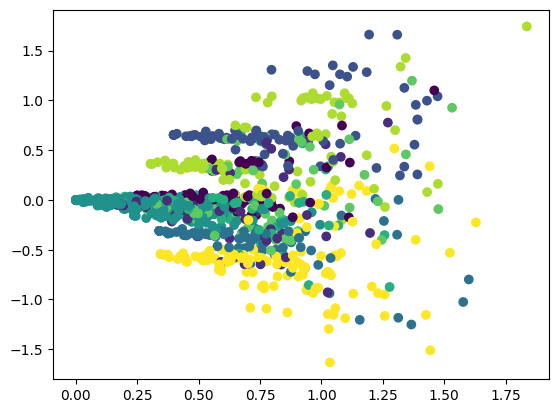

In [168]:
# reduce matrix and plot points
svd = TruncatedSVD(n_components=2)
svd.fit(df_matrix)
matrix_reduced = svd.transform(df_matrix)

plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1], c=cluster_labels)

## Find Similar Counties and Years

In [169]:
df1 = df.reset_index()
similarity_dict = {}

for index, row in df1.iterrows():
    # generate distances from target county to all other counties
    similar_counties = list(enumerate(cosine_sim[index]))
    
    # sort to get most similar counties first
    sorted_similar_counties = sorted(similar_counties, key = lambda x:x[1], reverse = True)

    similarity_dict[index] = sorted_similar_counties

In [170]:
# sample similarities for target county and year

# Baltimore County, 1982
target_similar_counties = similarity_dict[99]
print("\n-",df1['jurisdiction'].loc[99], df1['year'].loc[99])

# print top ten most similar counties
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break

# Montgomery County, 2005
target_similar_counties = similarity_dict[720]
print("\n-",df1['jurisdiction'].loc[720], df1['year'].loc[720])

# print top ten most similar counties
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break

# St. Mary's County, 2011
target_similar_counties = similarity_dict[910]
print("\n-",df1['jurisdiction'].loc[910], df1['year'].loc[910])

# print top ten most similar countiess
i=0
for county in target_similar_counties:
    print(df1['jurisdiction'].loc[county[0]], df1['year'].loc[county[0]], county[1])
    i = i+1;
    if i>10:
        break


- Baltimore City 1982
Baltimore City 1982 1.0000000000000002
Baltimore County 1999 0.8728715609439696
Baltimore County 1982 0.8660254037844388
Baltimore City 1977 0.816496580927726
Baltimore County 1996 0.816496580927726
Montgomery County 1990 0.816496580927726
Charles County 1996 0.7071067811865477
Anne Arundel County 1987 0.6666666666666669
Anne Arundel County 2001 0.6666666666666669
Anne Arundel County 2019 0.6666666666666669
Baltimore City 1980 0.6666666666666669

- Montgomery County 2005
Montgomery County 2005 1.0000000000000002
Montgomery County 1990 0.816496580927726
Anne Arundel County 2019 0.6666666666666669
Baltimore City 1982 0.6666666666666669
Baltimore County 2018 0.6666666666666669
Prince George's County 2013 0.6666666666666669
St. Mary's County 1982 0.6546536707079772
Harford County 2011 0.6405126152203486
Baltimore City 1993 0.5773502691896258
Baltimore City 1998 0.5773502691896258
Baltimore City 2013 0.5773502691896258

- St. Mary's County 2011
St. Mary's County 2011 

## Elbow Method

In [171]:
# Let us test different values of k
interia_scores = []
for test_k in range(2, 32, 2):
    print(test_k)
    
    tmp_model = KMeans(n_clusters=test_k)
    tmp_model.fit(county_cluster_df)
    
    score = tmp_model.inertia_
    interia_scores.append((test_k, score))

2
4
6
8
10
12
14
16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

18
20
22
24
26
28
30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The de

In [172]:
intertia_df = pd.DataFrame(interia_scores, columns=["k", "score"])
intertia_df

,k,score
0,2,1.815793e+03
1,4,3.271448e+02
2,6,1.195072e+02
3,8,3.733333e+01
4,10,7.985060e-28
5,12,7.985060e-28
6,14,8.951414e-28
7,16,7.955477e-28
8,18,8.308123e-28
9,20,1.379502e-27


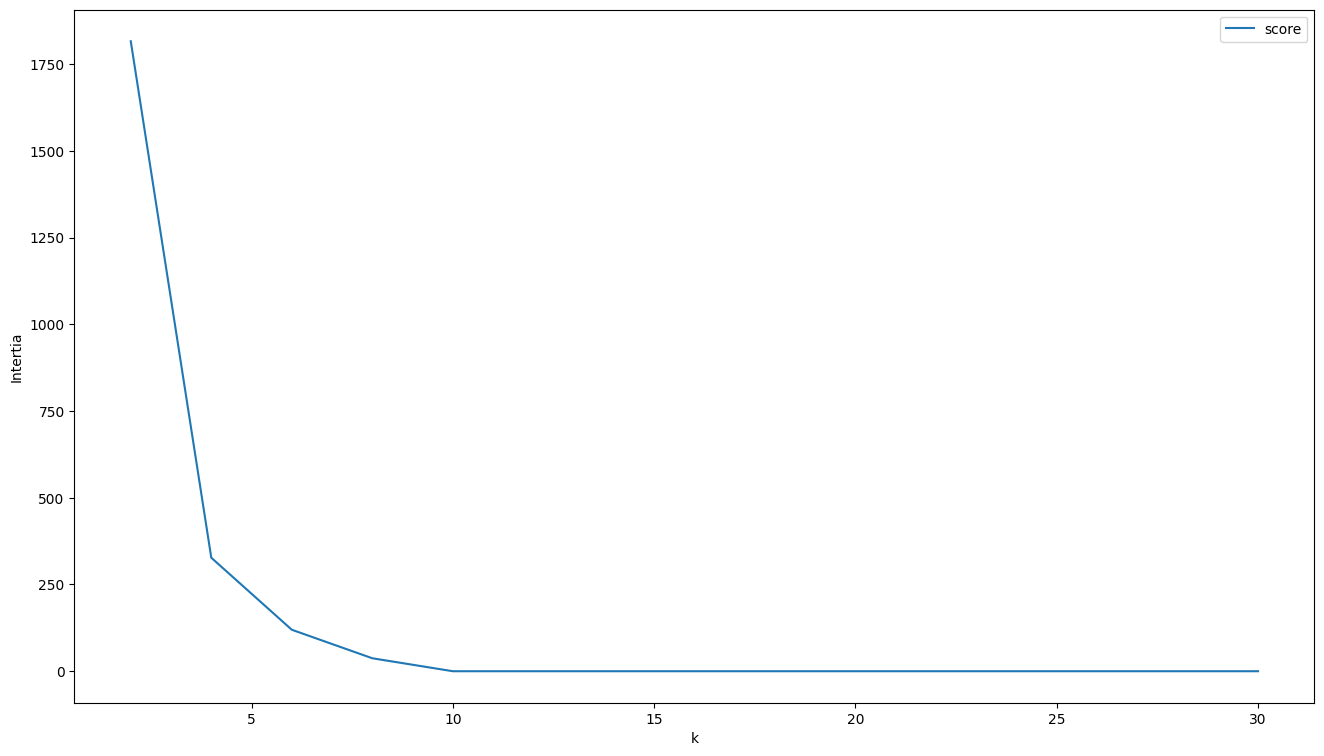

In [173]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

intertia_df.plot("k", "score", ax=ax)

ax.set_ylabel("Intertia")

plt.show()